# Self-Driving Car Engineer Nanodegree

## Project: Finding Lane Lines on the Road

## Import Packages

In [1]:
#Import some necessary packages and use abbreviation instead for using easily

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


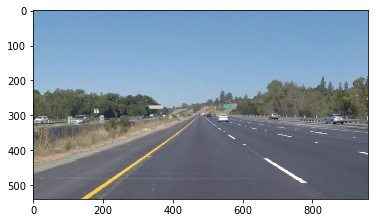

In [2]:
#Read in an image
image = mpimg.imread('test_images/solidYellowLeft.jpg')
#print out some stats and plotting
print('This image is:', type(image), 'with dimensions:',image.shape)
plt.imshow(image)  # imshow(image, cmap='gray') will show a single channel
#plt.axis('off')
plt.show()

In [3]:
#Define a function called grayscale which transforms the image read in
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [4]:
#Define a kernel size and apply Gaussian smoothing and the kernel_size should be an odd
def Gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size),0)

In [5]:
#Define Canny and its parameters 
def canny(img, low_threshold, high_threshold):
        return cv2.Canny(img, low_threshold, high_threshold)

In [6]:
#Create a masked edges image using cv2.fillpoly()
def region_of_interest(img, vertices):
#defining a blank mask to start with
    mask = np.zeros_like(img) 
    
#Define a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
#Filling pixels 
    cv2.fillPoly(mask, vertices, ignore_mask_color) 
    
#Returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [7]:
#iterate over the output "lines" and draw lines on an blank image
#using the function cv2.line() 
def draw_lines(img, lines, color=[255, 0, 0], thickness=8):
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)

In [8]:
#Run Hough on edge detected image
#Output "lines"is an array containing endpoints of detected line segments
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]),
                            minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    
    return line_img  

In [9]:
def weighted_img(img, initial_img, α=.8, β=1., γ=0.) :
# Draw the lines on the edge image
   return cv2.addWeighted(initial_img, α, img, β, γ) 

## Test Images

In [10]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

## Build a Lane Finding Pipeline

In [11]:
def Lane_finding_pipeline(img):
    # grayscale
    Gray = grayscale(img)
    
    # apply gaussian blur and Canny edges
    Gaus_blur = Gaussian_blur(Gray, 7)
    Canny_edges = canny(Gaus_blur, 50, 150)
    
    # ROI
    imshape = img.shape
    vertices = np.array([[(110,imshape[0]),(imshape[1]*.46,imshape[0]*.6),
                      (imshape[1]*.54,imshape[0]*.6),(imshape[1],imshape[0])]], dtype=np.int32)
    ROI = region_of_interest(Canny_edges,vertices)
    
    # hough lines
    rho = 1 
    theta = np.pi/180
    threshold = 30
    min_line_len = 5
    max_line_gap = 10
    Hough_lines = hough_lines(ROI, rho, theta, threshold, min_line_len, max_line_gap)
   
    # weighted lines
    Weighted_lines = weighted_img(Hough_lines,img)
    
    return Weighted_lines


(540, 960, 3)


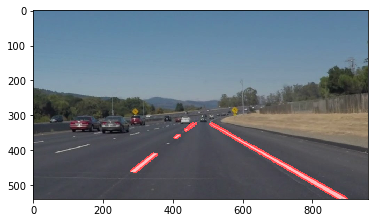

(540, 960, 3)


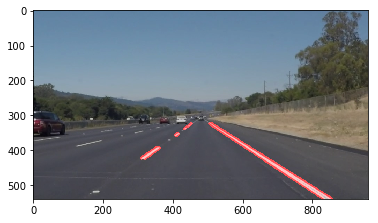

(540, 960, 3)


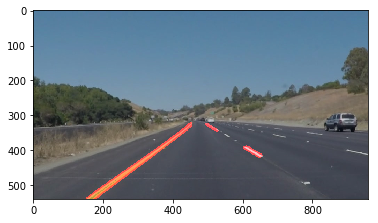

(540, 960, 3)


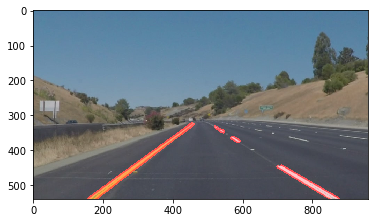

(540, 960, 3)


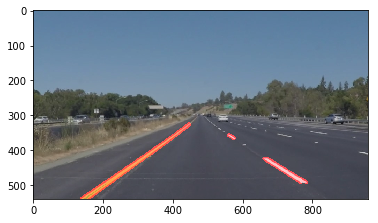

(540, 960, 3)


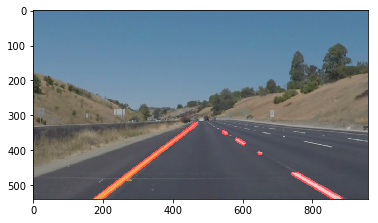

In [12]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.
#List_of_images = os.listdir("test_images/")
for i in os.listdir("test_images/"):
    image = cv2.imread("test_images/" + i)
    image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    Final_img = Lane_finding_pipeline(image1) 
    
    Final_img1=cv2.cvtColor(Final_img, cv2.COLOR_BGR2RGB)
    cv2.imwrite("test_images_output/" + i, Final_img1)

    print(Final_img.shape)
    plt.imshow(Final_img)
    plt.show()

## Test on Videos

In [13]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [14]:

def process_image(img):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes) 
    
    # grayscale
    Gray = grayscale(img)
    
    # apply gaussian blur and Canny edges
    Gaus_blur = Gaussian_blur(Gray, 7)
    Canny_edges = canny(Gaus_blur, 50, 150)
    
    # ROI
    imshape = img.shape
    vertices = np.array([[(110,imshape[0]),(imshape[1]*.46,imshape[0]*.6),
                      (imshape[1]*.54,imshape[0]*.6),(imshape[1],imshape[0])]], dtype=np.int32)
    ROI = region_of_interest(Canny_edges,vertices)
    
    # hough lines
    rho = 1 
    theta = np.pi/180
    threshold = 30
    min_line_len = 5
    max_line_gap = 10
    Hough_lines = hough_lines(ROI, rho, theta, threshold, min_line_len, max_line_gap)
   
    # weighted lines
    Weighted_lines = weighted_img(Hough_lines,img)
    
    result = Weighted_lines
    return result

In [15]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|███████████████████████████████████████▊| 221/222 [00:03<00:00, 61.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

Wall time: 3.98 s


In [16]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

In [17]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|███████████████████████████████████████▉| 681/682 [00:11<00:00, 61.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

Wall time: 11.6 s


In [18]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

## Optional Challenge

In [19]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4


100%|████████████████████████████████████████| 251/251 [00:08<00:00, 28.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

Wall time: 9.8 s


In [20]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))